<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Part 1 - Replicate the lesson code.
Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

- Stop just before Make Fake Prototypes

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.



In [0]:
# Import libraries needed for the lesson:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Use the 'magic' symbol (%) to specify some non-python code
%matplotlib inline
'''That line is only for jupyter notebooks, and allows plt figures to show up in
   your notebook. If you are using another editor, you'll uses:
    plt.show()
   at the end of all of your plotting commands to have the figure pop up in
   another window.'''

"That line is only for jupyter notebooks, and allows plt figures to show up in\n   your notebook. If you are using another editor, you'll uses:\n    plt.show()\n   at the end of all of your plotting commands to have the figure pop up in\n   another window."

In [4]:
# Specify the 'plot style' we want to use with pandas and matplotlib:
plt.style.available
# 'fast' is the default style, so you don't have to set it.

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
# List of other available plot styles you can use instead of 'fast'.
plt.style.use('fast')

### Pandas built-in tool
This is useful only for simple, quick-and-dirty plots.

For anything more complex you'll want to use a more robust visualization package such as `matplotlib`, `seaborn`, or `plotly`.



#### Continuous vs Categorical Variables

In [7]:
# Read in the titanic dataset:
titanic = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [8]:
# Cabin class is a categorical variable because it can be displayed using
#   either number or string values.
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [11]:
# Convert to string categories:
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(7)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
507,0,3,female,2.0,27.9000,Southampton,third
275,0,2,male,25.0,13.0000,Southampton,second
565,0,3,male,29.0,9.4833,Southampton,third
42,0,3,male,28.5,7.2292,Cherbourg,third
357,1,2,female,13.0,19.5000,Southampton,second
73,0,1,male,71.0,34.6542,Cherbourg,first
514,0,3,male,21.0,8.4333,Southampton,third


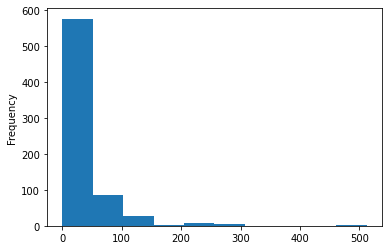

In [12]:
# Fare is a continuous variable, so we can display it with a histogram:
titanic['Fare'].plot(kind='hist');

In [13]:
# Remove the 2 extreme outliers:
print (titanic.shape)
titanic = titanic[titanic['Fare'] < 500]
print (titanic.shape)

(712, 7)
(709, 7)


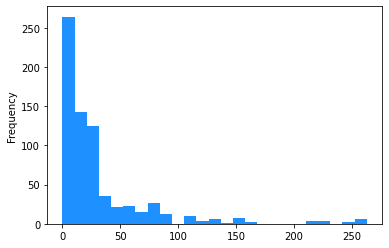

In [14]:
# Histogram will display better now:
titanic['Fare'].plot(kind='hist', color='dodgerblue', bins=25);

In [15]:
# Describe your continuous variable:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [16]:
# A Continuous varaiable can be converted to a categorical variable using binning.
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=[0, 8, 15, 32, 264],
                                labels=farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [0]:
# Check out the results:
fare_results = titanic['fare_groups'].value_counts().sort_index()

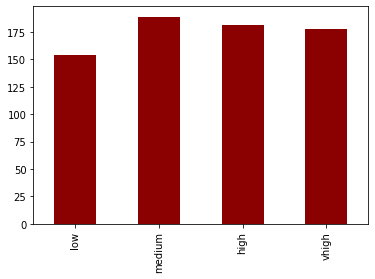

In [18]:
# Sometimes it's important to specify the range of your y-axis to get a more 
#   accurate result. 'lim' = 'limits':
fare_results.plot(kind='bar', color='darkred');

#### Display a Single Continuous Varable

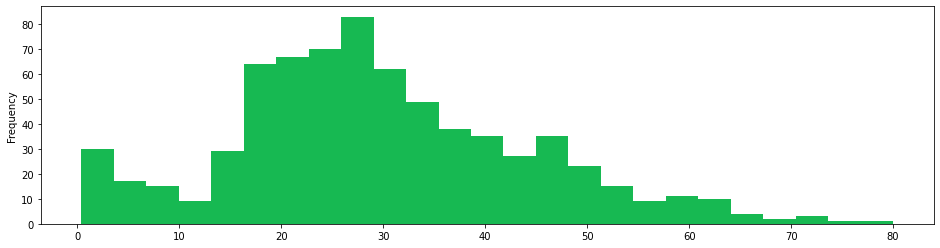

In [19]:
# Histogram:
titanic['Age'].plot(kind='hist',
                    bins=25,
                    figsize=(16, 4),
                    color='#17B952');

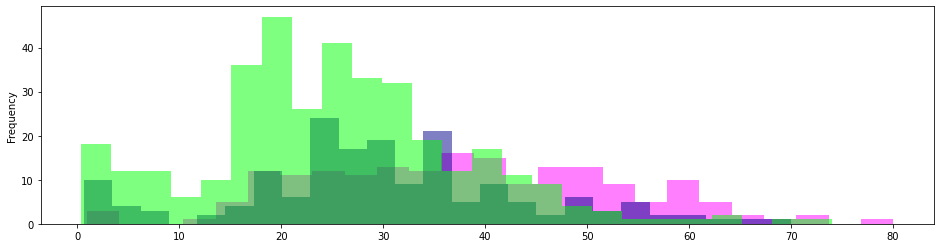

In [20]:
# Stacked Histogram of a continuous variable, broken out by categorical variable:
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4),
                                          color='magenta', alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4),
                                          color='darkblue', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4),
                                          color='lime', alpha=0.5);

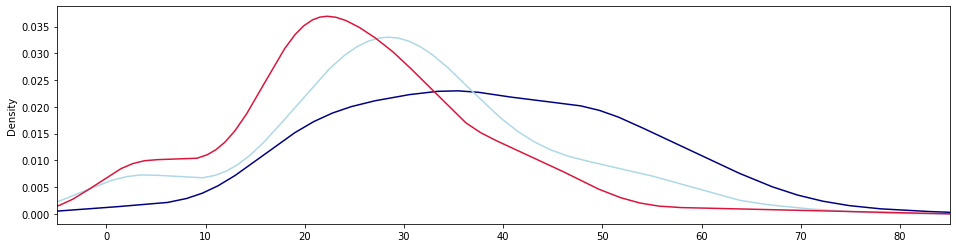

In [21]:
# This is actually easier to read using a Kernel Density Estimate (KDE).
# Note the use of 'xlim'. It is how you set your ticks on the x axis:
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), 
                                          color='navy', xlim=(-5, 85))
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4),
                                          color='lightblue', xlim=(-5, 85))
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), 
                                          color='crimson', xlim=(-5, 85));

#### Display a Single Categorical Variable

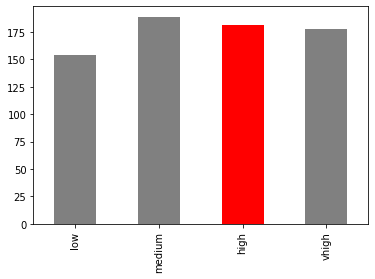

In [22]:
# Bar chart using colors to make a particular value 'pop'!
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', 
                                                        color=['gray', 'gray', 
                                                               'red', 'gray']);

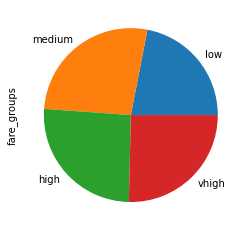

In [23]:
# Pie chart:
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', 
                                                        figsize=(4, 4));

#### Compare 2 Categorical Variables

In [24]:
# Compare 2 catergorical variables using crosstab:
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


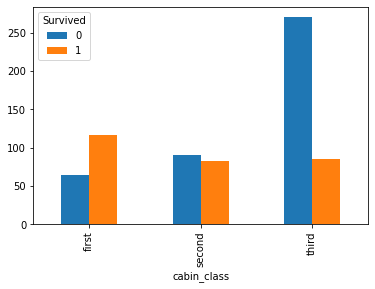

In [25]:
# Make that into a bar chart:
cab_death.plot(kind='bar');

In [26]:
# Crosstab with column percents:
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], 
                         normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


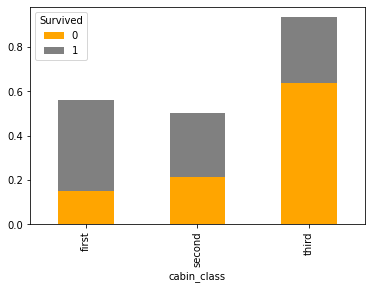

In [28]:
# Make a stacked bar chart for easy comparison of 2 categorical variables:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [29]:
# Crosstab with column percents:
cab_death2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'],
                         normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


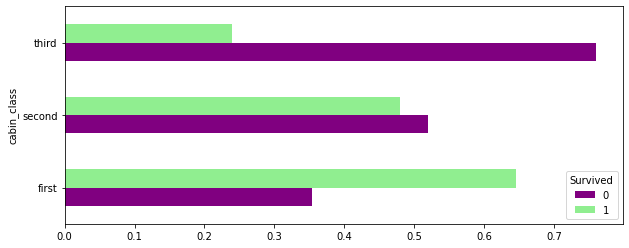

In [30]:
# A paired bar chart for comparison of 2 categorical variables:
# Note the use of 'barh'. It is how to create a horizontal bar chart.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10, 4));

#### Compare a Categorical and Continuous Variable

## Part 2 - Reproduce another [FiveThityEight's repository](https://data.fivethirtyeight.com/)
**WARNING:** There are a lot of very custom graphs and tables at the above link. I highly recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib.

If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought.

If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here